In [1]:
import pandas as pd
import numpy as np
import tensorflow as tf
import seaborn as sns
from tensorflow import keras
from tensorflow.keras import layers
from keras.models import Sequential
from keras.layers import Dense, SimpleRNN

In [2]:
train = pd.read_csv("../Data/train.csv").drop(columns="Unnamed: 0")
test = pd.read_csv("../Data/test.csv").drop(columns="Unnamed: 0")
train

,date,905270,921795,904261,905261,916328,923024,936365,902355,912215,...,9889RL,69568X,543755,77463M,29235J,131745,69487D,68157P,9110RA,292703
0,1990-01-02,22.75,12.63,30.00,29.61,3.8736,11.00,4.1250,24.50,58.00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1990-01-03,22.56,12.57,31.50,29.37,3.8876,11.00,4.0000,24.50,57.75,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1990-01-04,22.38,12.41,32.25,28.89,3.8806,11.38,3.9375,24.63,57.88,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1990-01-05,21.81,12.60,32.13,28.41,3.8387,11.50,3.8125,24.75,57.50,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1990-01-08,22.25,12.49,32.13,29.13,3.8387,11.50,3.8125,25.00,57.75,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6326,2015-02-09,53.81,11.39,29.69,20.35,44.5200,30.00,3.0400,57.94,68.13,...,NaN,43.496,26.490,14.47,47.37,16.20,80.97,46.78,4.180,68.80
6327,2015-02-10,53.81,11.39,29.69,20.35,44.9200,30.00,3.0400,57.94,68.13,...,NaN,43.258,26.350,14.46,49.10,16.50,81.96,47.61,4.158,69.70
6328,2015-02-11,53.81,11.39,29.69,20.35,44.9300,30.00,3.0700,57.94,68.13,...,NaN,42.560,26.420,14.79,49.51,16.69,83.86,48.94,4.160,73.14
6329,2015-02-12,53.81,11.39,29.69,20.35,45.2200,30.00,3.1200,57.94,68.13,...,NaN,40.576,27.260,14.78,50.16,16.83,85.39,49.60,4.190,73.94


In [3]:
train["date"] = pd.to_datetime(train["date"], format="%Y-%m-%d")
test["date"] = pd.to_datetime(test["date"], format="%Y-%m-%d")

In [24]:
# Looking at sample stock
sample = train[["916328"]]
sample

,916328
0,3.8736
1,3.8876
2,3.8806
3,3.8387
4,3.8387
...,...
6326,44.5200
6327,44.9200
6328,44.9300
6329,45.2200


In [25]:
step = 4
# add step elements into sample
sample = np.append(sample, np.repeat(sample.iloc[-1,], step))

In [26]:
# convert into dataset matrix
def convertToMatrix(data, step):
    X, Y = [], []
    for i in range(len(data) - step):
        d = i + step
        X.append(data[i:d, ])
        Y.append(data[d,])
    return np.array(X), np.array(Y)

sampleX, sampleY = convertToMatrix(sample, step)

In [27]:
sampleX

array([[ 3.8736,  3.8876,  3.8806,  3.8387],
       [ 3.8876,  3.8806,  3.8387,  3.8387],
       [ 3.8806,  3.8387,  3.8387,  3.8247],
       ...,
       [44.93  , 45.22  , 46.09  , 46.09  ],
       [45.22  , 46.09  , 46.09  , 46.09  ],
       [46.09  , 46.09  , 46.09  , 46.09  ]])

In [28]:
sampleY

array([ 3.8387,  3.8247,  3.7757, ..., 46.09  , 46.09  , 46.09  ])

In [29]:
# reshaping to 3d for inputting into Keras model
sampleX = np.reshape(sampleX, (sampleX.shape[0], 1, sampleX.shape[1]))
sampleX.shape

(6331, 1, 4)

In [30]:
# building SimpleRNN model
model = Sequential()
model.add(SimpleRNN(units=32, input_shape=(1, step), activation="relu"))
model.add(Dense(8, activation="relu"))
model.add(Dense(1))
model.compile(loss="mean_squared_error", optimizer="rmsprop")
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
simple_rnn_1 (SimpleRNN)     (None, 32)                1184      
_________________________________________________________________
dense_2 (Dense)              (None, 8)                 264       
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 9         
Total params: 1,457
Trainable params: 1,457
Non-trainable params: 0
_________________________________________________________________


In [31]:
model.fit(sampleX, sampleY, epochs=100, batch_size=16, verbose=2)

Epoch 1/100
396/396 - 2s - loss: 1.9342
Epoch 2/100
396/396 - 0s - loss: 0.2624
Epoch 3/100
396/396 - 0s - loss: 0.2572
Epoch 4/100
396/396 - 0s - loss: 0.2518
Epoch 5/100
396/396 - 0s - loss: 0.2434
Epoch 6/100
396/396 - 0s - loss: 0.2263
Epoch 7/100
396/396 - 0s - loss: 0.2160
Epoch 8/100
396/396 - 0s - loss: 0.2155
Epoch 9/100
396/396 - 0s - loss: 0.2136
Epoch 10/100
396/396 - 0s - loss: 0.2088
Epoch 11/100
396/396 - 0s - loss: 0.2022
Epoch 12/100
396/396 - 0s - loss: 0.1899
Epoch 13/100
396/396 - 0s - loss: 0.1838
Epoch 14/100
396/396 - 0s - loss: 0.1886
Epoch 15/100
396/396 - 0s - loss: 0.1832
Epoch 16/100
396/396 - 0s - loss: 0.1787
Epoch 17/100
396/396 - 0s - loss: 0.1782
Epoch 18/100
396/396 - 0s - loss: 0.1668
Epoch 19/100
396/396 - 0s - loss: 0.1635
Epoch 20/100
396/396 - 0s - loss: 0.1667
Epoch 21/100
396/396 - 0s - loss: 0.1588
Epoch 22/100
396/396 - 0s - loss: 0.1590
Epoch 23/100
396/396 - 0s - loss: 0.1581
Epoch 24/100
396/396 - 0s - loss: 0.1568
Epoch 25/100
396/396 - 0s

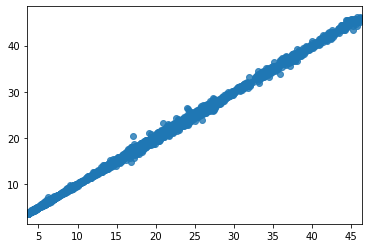

In [32]:
pred_sample = model.predict(sampleX)
sns.regplot(x=sampleY, y=pred_sample)

In [34]:
df = pd.DataFrame()
df["sampleY"] = sampleY
df["pred_sample"] = pred_sample
df = df.iloc[:-4,]
df["date"] = train["date"].iloc[4:].reset_index(drop=True)
df

,sampleY,pred_sample,date
0,3.8387,3.850487,1990-01-08
1,3.8247,3.846612,1990-01-09
2,3.7757,3.835964,1990-01-10
3,3.8107,3.789540,1990-01-11
4,3.7338,3.814155,1990-01-12
...,...,...,...
6322,44.5200,45.560707,2015-02-09
6323,44.9200,44.654690,2015-02-10
6324,44.9300,44.915997,2015-02-11
6325,45.2200,44.989994,2015-02-12


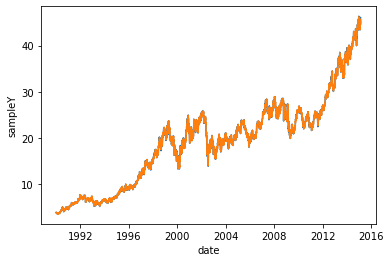

In [35]:
sns.lineplot(data=df, x="date", y="sampleY")
sns.lineplot(data=df, x="date", y="pred_sample")

In [36]:
test_out = test[["916328"]]
test_out = np.append(test_out, np.repeat(test_out.iloc[-1,], step))

In [37]:
testX, testY = convertToMatrix(test_out, step)
testX

array([[ 46.41,  46.41,  46.61,  47.48],
       [ 46.41,  46.61,  47.48,  47.32],
       [ 46.61,  47.48,  47.32,  47.47],
       ...,
       [116.75, 115.69, 116.65, 116.65],
       [115.69, 116.65, 116.65, 116.65],
       [116.65, 116.65, 116.65, 116.65]])

In [38]:
# reshaping to 3d for inputting into Keras model
testX = np.reshape(testX, (testX.shape[0], 1, testX.shape[1]))
testX.shape

(1583, 1, 4)

In [39]:
pred_test = model.predict(testX)
pred_test

array([[ 47.358013],
       [ 47.319897],
       [ 47.41279 ],
       ...,
       [116.70931 ],
       [116.61524 ],
       [116.67281 ]], dtype=float32)

In [40]:
df = pd.DataFrame()
df["testY"] = testY
df["pred_test"] = pred_test
df = df.iloc[:-4,]
df["date"] = test["date"].iloc[4:].reset_index(drop=True)
df

,testY,pred_test,date
0,47.32,47.358013,2015-02-23
1,47.47,47.319897,2015-02-24
2,47.40,47.412788,2015-02-25
3,47.61,47.428440,2015-02-26
4,47.37,47.584549,2015-02-27
...,...,...,...
1574,117.29,117.248207,2021-05-24
1575,118.40,117.222908,2021-05-25
1576,116.75,118.294090,2021-05-26
1577,115.69,116.976692,2021-05-27


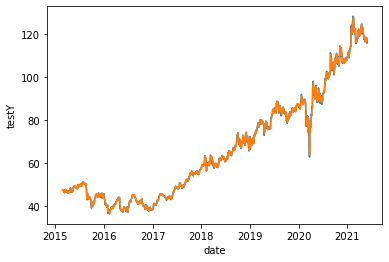

In [41]:
sns.lineplot(data=df, x="date", y="testY")
sns.lineplot(data=df, x="date", y="pred_test")

In [42]:
# Model metrics
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

print("MAE: " + str(mean_absolute_error(y_true=df.testY, y_pred=df.pred_test)))
print("MSE: " + str(mean_squared_error(y_true=df.testY, y_pred=df.pred_test)))
print("R2: " + str(r2_score(y_true=df.testY, y_pred=df.pred_test)))

MAE: 0.7301479703433306
MSE: 1.2897302346057542
R2: 0.9978427445301208


In [67]:
model.predict([[[116.66503, 116.722115, 116.678474, 116.70525]]])[0, 0]

116.7219

In [77]:
def predict_price(model, days, last_prices, prediction):
    if days == 0:
        return prediction
    prediction = model.predict([[last_prices]])[0, 0]
    last_prices.append(prediction)
    last_prices = last_prices[1:]
    print(prediction)
    print(last_prices)
    return predict_price(model, days - 1, last_prices, prediction)

predict_price(model, 5, [118.40, 116.75, 115.69, 116.65], 0)

116.66503
[116.75, 115.69, 116.65, 116.66503]
116.722115
[115.69, 116.65, 116.66503, 116.722115]
116.678474
[116.65, 116.66503, 116.722115, 116.678474]
116.70525
[116.66503, 116.722115, 116.678474, 116.70525]


ValueError: Failed to find data adapter that can handle input: (<class 'list'> containing values of types {'(<class \'list\'> containing values of types {\'(<class \\\'list\\\'> containing values of types {"<class \\\'numpy.float32\\\'>"})\'})'}), <class 'NoneType'>